# 3.4 Convolutional Neural Network (CNN) models 

kernel = audio 8_2_tf \
use audio_8_2_tf_requirements.txt as the requirements.txt file 

## To Do 


In [90]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [91]:
tf.__version__

'2.17.0'

## Changes
* 9 Added gender and age categorical varaibles to CNN
* 8 Fixed hyperparameter tuning on MLP 
* 7 Add the CNN model, refactored,from PyTorch to TensorFlow
* 6 Automated hyperparameter estimation on MLP
* 5 Added the gender and age categorical variables as inputs
* 4 Added other MFCC metrics as numerical features from my preprocess script
* 3 added MFCC from my preprocessing scripts, added classification and class-imbalance metrics and performance improved to 80%+ accuracy
* 2 used MFCC calculated from the SAIE dataset from the method given in the script


In [92]:
import librosa
from pydub import AudioSegment
import soundfile as sf
import ffmpeg
from IPython.display import Audio

In [93]:
import pandas as pd
import numpy as np
import os
import random

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
librosa.__version__

'0.10.2.post1'

In [97]:
import keras_tuner as kt

## File inputs and GLOBAL VARIABLES

In [98]:
#file_class=pd.read_csv('file_class.csv',index_col=0) #"C:\Users\GGMachines_Gaming\Documents\voxpop\file_class.df"

In [99]:
cwd=os.getcwd()
print(cwd)

C:\Users\GGMachines_Gaming\Documents\voxpop


In [100]:
INPUT_DIRECTORY=cwd

In [101]:
INPUT_DIRECTORY

'C:\\Users\\GGMachines_Gaming\\Documents\\voxpop'

In [102]:
#INPUT_DIRECTORY='C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\' #i9 machine

In [103]:
TRAIN_TEST_SPLIT = 0.80

In [2]:
# Keras tuner RandomSearch parameters 
MAX_TRIALS=10
EXECUTIONS_PER_TRIAL=3

In [104]:
# Neural network training run parameters
EPOCHS=20
BATCH_SIZE=32

In [105]:
## Used in versions 1,2 instead of the pickle preprocessing output

# file_class=pd.read_csv('file_class.csv',index_col=0) #"C:\Users\GGMachines_Gaming\Documents\voxpop\file_class.df"
# file_class.shape

In [106]:
platform=os.name
print(platform)

nt


In [107]:
if (platform=='nt'):
    SUBDIR="\\sample_output_directory\\"
print(SUBDIR)

\sample_output_directory\


In [108]:
def retrieve_file(county):
    all_files=os.listdir(INPUT_DIRECTORY+SUBDIR)
    pkl_files = [f for f in all_files if f.endswith('.pkl')]
    #print(pkl_files)
    filtered_files = [file for file in pkl_files if county in file]
    #print(filtered_files)
    most_recent_file=filtered_files[-1]
    #print(most_recent_file)
    return most_recent_file

In [109]:
retrieve_file('DUB')

'20240721_0000_DUB_features.pkl'

In [110]:
retrieve_file('ANT')

'20240721_0013_ANT_features.pkl'

In [111]:
'''
all_files=os.listdir(cwd+subdir)
pkl_files = [f for f in all_files if f.endswith('.pkl')]
print(pkl_files)
filtered_files = [file for file in pkl_files if 'DUB' in file]
print(filtered_files)
most_recent_file=filtered_files[-1]
print(most_recent_file)
'''

"\nall_files=os.listdir(cwd+subdir)\npkl_files = [f for f in all_files if f.endswith('.pkl')]\nprint(pkl_files)\nfiltered_files = [file for file in pkl_files if 'DUB' in file]\nprint(filtered_files)\nmost_recent_file=filtered_files[-1]\nprint(most_recent_file)\n"

In [112]:
dub_df=pd.read_pickle(INPUT_DIRECTORY+SUBDIR+retrieve_file('DUB'))

In [113]:
#dub_df = pd.read_pickle('C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\20240721_0000_DUB_features.pkl') #i9 directory

In [114]:
dub_df[0:3]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20,DUB,Artane,None,None,M,20,81.63,0,0,DUB_Artane_M_20_Rec_0_Sample_0.wav,"[1.5543122e-15, 3.330669e-15, 3.5527137e-15, 3...","[[-45.312862, -45.312862, -20.940594, -15.0561...",22050,"[[-655.949, -615.1495, -328.68915, -242.04138,...","[[49.801403, 49.801403, 49.801403, 49.801403, ...","[[-30.38227, -30.38227, -30.38227, -30.38227, ..."
1,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20,DUB,Artane,None,None,M,20,81.63,0,1,DUB_Artane_M_20_Rec_0_Sample_1.wav,"[-0.008644444, -0.01465759, -0.012110229, 0.00...","[[-34.0381, -32.152866, -36.18184, -49.078957,...",22050,"[[-280.54608, -219.32281, -217.8543, -227.0891...","[[16.633562, 16.633562, 16.633562, 16.633562, ...","[[-3.0967958, -3.0967958, -3.0967958, -3.09679..."
2,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20,DUB,Artane,None,None,M,20,81.63,0,2,DUB_Artane_M_20_Rec_0_Sample_2.wav,"[-0.013591497, -0.009562584, -0.0034573623, 0....","[[-26.495678, -26.199865, -34.241257, -27.4409...",22050,"[[-334.6902, -300.3063, -289.8084, -286.79123,...","[[5.437888, 5.437888, 5.437888, 5.437888, 5.43...","[[-1.3182307, -1.3182307, -1.3182307, -1.31823..."


In [115]:
antbel_df = pd.read_pickle(INPUT_DIRECTORY+SUBDIR+retrieve_file('ANT'))

In [116]:
#antbel_df = pd.read_pickle('C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\20240721_0013_ANT_features.pkl') #i9 directory

In [117]:
antbel_df[0:3]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,0,ANT_Antrim_R1_F_20_Rec_0_Sample_0.wav,"[-3.259629e-09, -1.9790605e-09, -1.8626451e-09...","[[-35.601192, -23.076942, -25.175114, -30.8771...",22050,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,1,ANT_Antrim_R1_F_20_Rec_0_Sample_1.wav,"[-0.063719966, 0.018594107, 0.042440787, 0.011...","[[-24.939114, -19.037073, -35.540073, -40.6882...",22050,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,2,ANT_Antrim_R1_F_20_Rec_0_Sample_2.wav,"[-0.009588398, -0.029184137, -0.023096263, -0....","[[-12.003866, -22.771717, -25.912066, -27.5487...",22050,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ..."


## Reset recording numbers to avoid duplicates

In [118]:
recordings_count=dub_df['recording num'].max()
recordings_count

166

In [119]:
#Increase the recording number in the 2nd dataframe so that there are no duplicates
antbel_df['recording num']=dub_df['recording num']+recordings_count
antbel_df['recording num']

0       166
1       166
2       166
3       166
4       166
       ... 
6489    237
6490    237
6491    237
6492    237
6493    237
Name: recording num, Length: 6494, dtype: object

## Merge the DataFrames

In [120]:
# Concatenate the DataFrames
all_df= pd.concat([antbel_df, dub_df], ignore_index=True)

In [121]:
all_df.columns

Index(['filenames', 'names', 'counties', 'towns', 'urbanrural', 'size',
       'genders', 'ages', 'dur', 'recording num', 'sample num',
       'sample file name', 'sample', 'Ydb', 'sr', 'mfcc', 'mfcc_delta',
       'mfcc_delta_2'],
      dtype='object')

In [122]:
all_df.shape

(21594, 18)

In [123]:
all_df.iloc[0:4]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
0,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,166,0,ANT_Antrim_R1_F_20_Rec_0_Sample_0.wav,"[-3.259629e-09, -1.9790605e-09, -1.8626451e-09...","[[-35.601192, -23.076942, -25.175114, -30.8771...",22050,"[[-494.3632, -314.76587, -256.5209, -248.23921...","[[22.54509, 22.54509, 22.54509, 22.54509, 22.5...","[[-13.363751, -13.363751, -13.363751, -13.3637..."
1,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,166,1,ANT_Antrim_R1_F_20_Rec_0_Sample_1.wav,"[-0.063719966, 0.018594107, 0.042440787, 0.011...","[[-24.939114, -19.037073, -35.540073, -40.6882...",22050,"[[-200.87267, -189.22813, -205.93425, -217.350...","[[1.7263998, 1.7263998, 1.7263998, 1.7263998, ...","[[8.442614, 8.442614, 8.442614, 8.442614, 8.44..."
2,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,166,2,ANT_Antrim_R1_F_20_Rec_0_Sample_2.wav,"[-0.009588398, -0.029184137, -0.023096263, -0....","[[-12.003866, -22.771717, -25.912066, -27.5487...",22050,"[[-269.9958, -209.71855, -199.9971, -192.51334...","[[7.1880474, 7.1880474, 7.1880474, 7.1880474, ...","[[-7.412616, -7.412616, -7.412616, -7.412616, ..."
3,C:\Users\GGMachines_Gaming\Documents\ANT\ANT_A...,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,166,3,ANT_Antrim_R1_F_20_Rec_0_Sample_3.wav,"[-0.02926175, -0.03246651, -0.03447114, -0.032...","[[-33.829704, -37.727036, -24.553106, -31.8029...",22050,"[[-319.19656, -307.64944, -314.54547, -295.997...","[[9.711183, 9.711183, 9.711183, 9.711183, 9.71...","[[-0.45292982, -0.45292982, -0.45292982, -0.45..."


In [124]:
antbel_df['ages'].value_counts()

ages
20    3784
30     599
25     458
40     334
55     235
70     224
50     203
60     185
16     154
65     127
35      97
80      94
Name: count, dtype: int64

In [125]:
dub_df['ages'].value_counts()

ages
20    12914
15      536
30      465
35      371
25      268
40      220
50      186
45      140
Name: count, dtype: int64

In [126]:
all_df['ages'].value_counts()

ages
20    16698
30     1064
25      726
40      554
15      536
35      468
50      389
55      235
70      224
60      185
16      154
45      140
65      127
80       94
Name: count, dtype: int64

In [127]:
16698+1064+726+554+536+468+389+235+224+185+154+140+127+94

21594

In [128]:
"""
# One-hot encoding: Put one column in for every value of the categorical variables

all_df = pd.get_dummies(all_df, columns=['genders','ages'],prefix=[None,None])

"""

"\n# One-hot encoding: Put one column in for every value of the categorical variables\n\nall_df = pd.get_dummies(all_df, columns=['genders','ages'],prefix=[None,None])\n\n"

In [129]:
#all_df.loc[:,80].value_counts()

In [130]:
#all_df.iloc[0:4,-16:]

## Merge the samples with counties=ANT and BEL to give a common Antrim and Belfast dataset

In [131]:
counties=all_df['counties']

In [132]:
all_df['counties'] = all_df['counties'].replace({'ANT': 'ANTBEL', 'BEL': 'ANTBEL'})

In [133]:
all_df['counties'].value_counts()

counties
DUB       15100
ANTBEL     6494
Name: count, dtype: int64

In [134]:
print(all_df['counties'].shape)

(21594,)


## Replace counties with a binary value

In [135]:
all_df['y'] = all_df['counties'].replace({'ANTBEL':1, 'DUB': 0})

C:\Users\GGMachines_Gaming\AppData\Local\Temp\ipykernel_4580\3374583436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_df['y'] = all_df['counties'].replace({'ANTBEL':1, 'DUB': 0})


In [136]:
all_df['y']

0        1
1        1
2        1
3        1
4        1
        ..
21589    0
21590    0
21591    0
21592    0
21593    0
Name: y, Length: 21594, dtype: int64

In [137]:
all_df['y'].value_counts()

y
0    15100
1     6494
Name: count, dtype: int64

## Split into train and test datasets - make sure speakers are not split between them

In [138]:
# Count the unique recording values, then shuffle the unique values
unique_recordings = all_df['recording num'].unique()
random.seed(1)
np.random.shuffle(unique_recordings)  

# Determine the split index
split_index = int(len(unique_recordings) * TRAIN_TEST_SPLIT)
print(split_index)

190


In [139]:
unique_recordings

array([199, 44, 156, 165, 230, 64, 72, 29, 176, 58, 80, 185, 47, 122, 169,
       146, 179, 195, 202, 211, 166, 188, 94, 95, 168, 184, 63, 160, 194,
       142, 62, 14, 121, 136, 49, 189, 103, 10, 227, 139, 26, 16, 107, 6,
       46, 201, 43, 234, 218, 205, 28, 39, 93, 3, 209, 206, 117, 137, 50,
       32, 69, 119, 187, 33, 197, 219, 42, 27, 81, 163, 124, 22, 213, 123,
       180, 36, 141, 85, 70, 170, 21, 34, 144, 109, 97, 83, 131, 235, 24,
       183, 196, 60, 193, 53, 86, 88, 78, 112, 220, 87, 224, 216, 231,
       192, 82, 67, 74, 149, 191, 76, 30, 5, 167, 90, 91, 140, 232, 48,
       51, 99, 154, 222, 118, 178, 75, 223, 159, 113, 133, 8, 116, 134,
       108, 135, 236, 200, 77, 143, 164, 228, 98, 55, 203, 171, 12, 162,
       181, 210, 125, 214, 204, 65, 212, 114, 11, 13, 57, 37, 190, 106,
       151, 73, 145, 110, 127, 15, 115, 174, 233, 40, 61, 129, 175, 172,
       25, 161, 229, 68, 237, 31, 148, 157, 92, 66, 101, 147, 126, 186,
       52, 56, 2, 182, 207, 105, 173, 155, 84, 13

In [ ]:
'''
unique _recordings=
array([199, 44, 156, 165, 230, 64, 72, 29, 176, 58, 80, 185, 47, 122, 169,
       146, 179, 195, 202, 211, 166, 188, 94, 95, 168, 184, 63, 160, 194,
       142, 62, 14, 121, 136, 49, 189, 103, 10, 227, 139, 26, 16, 107, 6,
       46, 201, 43, 234, 218, 205, 28, 39, 93, 3, 209, 206, 117, 137, 50,
       32, 69, 119, 187, 33, 197, 219, 42, 27, 81, 163, 124, 22, 213, 123,
       180, 36, 141, 85, 70, 170, 21, 34, 144, 109, 97, 83, 131, 235, 24,
       183, 196, 60, 193, 53, 86, 88, 78, 112, 220, 87, 224, 216, 231,
       192, 82, 67, 74, 149, 191, 76, 30, 5, 167, 90, 91, 140, 232, 48,
       51, 99, 154, 222, 118, 178, 75, 223, 159, 113, 133, 8, 116, 134,
       108, 135, 236, 200, 77, 143, 164, 228, 98, 55, 203, 171, 12, 162,
       181, 210, 125, 214, 204, 65, 212, 114, 11, 13, 57, 37, 190, 106,
       151, 73, 145, 110, 127, 15, 115, 174, 233, 40, 61, 129, 175, 172,
       25, 161, 229, 68, 237, 31, 148, 157, 92, 66, 101, 147, 126, 186,
       52, 56, 2, 182, 207, 105, 173, 155, 84, 132, 35, 89, 215, 153, 59,
       1, 158, 79, 226, 20, 18, 71, 102, 198, 128, 38, 17, 54, 150, 221,
       19, 100, 177, 4, 41, 130, 120, 9, 208, 138, 104, 152, 96, 217, 23,
       225, 0, 45, 7, 111], 
       dtype=object)

In [140]:
# Split the unique values into two sets for train and test datasets WITH DIFFERENT SPEAKERS IN EACH
recording_train = unique_recordings[:split_index]
recording_test = unique_recordings[split_index:]

In [141]:
print(recording_train) # TRAIN portion of the randomly shuffled dataset

[199 44 156 165 230 64 72 29 176 58 80 185 47 122 169 146 179 195 202 211
 166 188 94 95 168 184 63 160 194 142 62 14 121 136 49 189 103 10 227 139
 26 16 107 6 46 201 43 234 218 205 28 39 93 3 209 206 117 137 50 32 69 119
 187 33 197 219 42 27 81 163 124 22 213 123 180 36 141 85 70 170 21 34 144
 109 97 83 131 235 24 183 196 60 193 53 86 88 78 112 220 87 224 216 231
 192 82 67 74 149 191 76 30 5 167 90 91 140 232 48 51 99 154 222 118 178
 75 223 159 113 133 8 116 134 108 135 236 200 77 143 164 228 98 55 203 171
 12 162 181 210 125 214 204 65 212 114 11 13 57 37 190 106 151 73 145 110
 127 15 115 174 233 40 61 129 175 172 25 161 229 68 237 31 148 157 92 66
 101 147 126 186 52 56]


In [142]:
print(recording_test) # TEST portion of the randomly shuffled dataset

[2 182 207 105 173 155 84 132 35 89 215 153 59 1 158 79 226 20 18 71 102
 198 128 38 17 54 150 221 19 100 177 4 41 130 120 9 208 138 104 152 96 217
 23 225 0 45 7 111]


In [143]:
# Create two new DataFrames based on the split unique values
train_df = all_df[all_df['recording num'].isin(recording_train)].reset_index(drop=True)


In [282]:
test_df = all_df[all_df['recording num'].isin(recording_test)].reset_index(drop=True)

In [144]:
train_df.shape

(17211, 19)

In [145]:
test_df.shape

(4383, 19)

In [146]:
train_df.columns

Index(['filenames', 'names', 'counties', 'towns', 'urbanrural', 'size',
       'genders', 'ages', 'dur', 'recording num', 'sample num',
       'sample file name', 'sample', 'Ydb', 'sr', 'mfcc', 'mfcc_delta',
       'mfcc_delta_2', 'y'],
      dtype='object')

In [147]:
test_df.columns

Index(['filenames', 'names', 'counties', 'towns', 'urbanrural', 'size',
       'genders', 'ages', 'dur', 'recording num', 'sample num',
       'sample file name', 'sample', 'Ydb', 'sr', 'mfcc', 'mfcc_delta',
       'mfcc_delta_2', 'y'],
      dtype='object')

## Inspect MFCCx features

In [148]:
# Each individual MFCC shape
train_df['mfcc'][0].shape

(20, 44)

In [149]:
# Full array of MFCC values
train_df['mfcc'].shape

(17211,)

In [150]:
X_train = np.stack((train_df['mfcc'],train_df['mfcc_delta'],train_df['mfcc_delta_2']),axis=-1)

In [151]:
X_train.shape

(17211, 3)

In [152]:
#X_train = np.stack((train_df['mfcc'],train_df['mfcc_delta'],train_df['mfcc_delta_2']),axis=-1)

In [153]:
train_df['mfcc'].shape

(17211,)

In [154]:
type(train_df['mfcc'])

pandas.core.series.Series

In [155]:
type(train_df['mfcc'][0])

numpy.ndarray

In [156]:
train_df['mfcc'][0].shape

(20, 44)

In [157]:
train_df['mfcc']

0        [[-494.3632, -314.76587, -256.5209, -248.23921...
1        [[-200.87267, -189.22813, -205.93425, -217.350...
2        [[-269.9958, -209.71855, -199.9971, -192.51334...
3        [[-319.19656, -307.64944, -314.54547, -295.997...
4        [[-238.38216, -228.49149, -256.09305, -273.210...
                               ...                        
17206    [[-110.30995, -99.04926, -126.198555, -136.179...
17207    [[-97.73651, -89.979546, -113.11529, -134.1764...
17208    [[-239.09358, -160.47281, -144.84918, -154.863...
17209    [[-87.451416, -108.45021, -148.85347, -161.430...
17210    [[-170.16429, -178.88602, -222.11624, -225.288...
Name: mfcc, Length: 17211, dtype: object

In [158]:
train_df['mfcc'][0][0]

array([-494.3632 , -314.76587, -256.5209 , -248.23921, -253.03188,
       -255.51733, -248.05202, -232.95198, -219.96217, -142.84169,
        -97.36846, -110.77999, -132.57796, -174.49683, -258.99118,
       -296.77695, -227.69757, -172.99887, -191.70612, -218.03659,
       -223.80177, -241.4747 , -248.62724, -224.09459, -206.40266,
       -212.6678 , -253.71323, -299.12943, -224.64539, -194.39392,
       -214.50746, -199.5038 , -175.75398, -197.1167 , -248.56822,
       -264.3485 , -266.5907 , -286.43826, -294.3691 , -290.6586 ,
       -294.62158, -269.237  , -165.28264, -153.55447], dtype=float32)

In [159]:
type(train_df['mfcc'][0][0])

numpy.ndarray

In [160]:
train_df['mfcc'][0][0].shape

(44,)

In [161]:
X_train.shape

(17211, 3)

In [162]:
X_train[0][0].shape

(20, 44)

In [163]:
X_test = np.stack((test_df['mfcc'],test_df['mfcc_delta'],test_df['mfcc_delta_2']),axis=-1)

In [164]:
#X_test = np.stack((test_df['mfcc'],test_df['mfcc_delta'],test_df['mfcc_delta_2']))

In [165]:
X_test.shape

(4383, 3)

In [166]:
X_test[0][0].shape

(20, 44)

## Reshape MFCC features

In [167]:
def preprocess_features(feature: str ='mfcc', input: pd.DataFrame =train_df, output: pd.DataFrame ='X', ): 
    '''
    preprocess_features(feature: str ='mfcc', input: pd.DataFrame =train_df, output: pd.DataFrame ='X',)
    feature = numerical feature from dataset, usually 'mfcc', 'mfcc_delta', 'mfcc_delta_2'
    input = source dataset, usually train_df or test_df
    output = destination output dataframe
    '''
    flattened=[]
    flattened_index=input.index
    for j in input[feature]:
        flattened.append(np.array(j.flatten()))
    #print(len(flattened))
    output = pd.Series(flattened, index=flattened_index)
    output = np.stack(output.values)
    return output


In [168]:
mfcc_train=preprocess_features('mfcc')
print(mfcc_train)
print(mfcc_train.shape)
print(type(mfcc_train))

[[-4.94363190e+02 -3.14765869e+02 -2.56520905e+02 ... -1.60376263e+00
  -3.11242390e+00 -1.56794906e+00]
 [-2.00872665e+02 -1.89228134e+02 -2.05934250e+02 ...  9.28223610e+00
   8.04540825e+00  1.06966095e+01]
 [-2.69995789e+02 -2.09718552e+02 -1.99997101e+02 ... -3.92313886e+00
  -7.42311621e+00 -5.33314514e+00]
 ...
 [-2.39093582e+02 -1.60472809e+02 -1.44849182e+02 ... -3.65712166e-01
  -8.62231541e+00 -7.36551952e+00]
 [-8.74514160e+01 -1.08450211e+02 -1.48853470e+02 ... -3.99238062e+00
  -2.72970438e+00 -2.40183997e+00]
 [-1.70164291e+02 -1.78886017e+02 -2.22116241e+02 ... -1.29232941e+01
  -1.03022346e+01 -5.41623688e+00]]
(17211, 880)
<class 'numpy.ndarray'>


In [169]:
mfcc_test=preprocess_features(feature='mfcc',input=test_df)
print(mfcc_test)
print(mfcc_test.shape)
print(type(mfcc_test))

[[-452.64767   -411.43454   -391.5388    ...  -10.430422    -7.7031803
     2.0929403]
 [-178.97302   -156.64561   -181.34474   ...    5.3141727    9.715349
     8.232244 ]
 [-315.19617   -287.7445    -295.76566   ...    2.5518966    4.0287046
     5.4730225]
 ...
 [-220.1493    -177.04103   -183.83517   ...   -4.240228    -5.7556987
     1.8292282]
 [-347.27066   -262.6404    -208.97043   ...    7.470333     4.5664196
     1.7955532]
 [-151.13069   -170.42526   -261.93442   ...  -11.026726    -7.1821594
    -7.4268785]]
(4383, 880)
<class 'numpy.ndarray'>


In [170]:
mfcc_delta_train=preprocess_features('mfcc_delta')
mfcc_delta_train[0:3]

array([[22.54509   , 22.54509   , 22.54509   , ..., -0.12745161,
        -0.12745161, -0.12745161],
       [ 1.7263998 ,  1.7263998 ,  1.7263998 , ...,  1.8224183 ,
         1.8224183 ,  1.8224183 ],
       [ 7.1880474 ,  7.1880474 ,  7.1880474 , ..., -0.73991925,
        -0.73991925, -0.73991925]], dtype=float32)

In [171]:
mfcc_delta_test=preprocess_features(feature='mfcc_delta',input=test_df)
mfcc_delta_test[0:3]

array([[ 13.429796  ,  13.429796  ,  13.429796  , ...,  -1.9513919 ,
         -1.9513919 ,  -1.9513919 ],
       [-12.732409  , -12.732409  , -12.732409  , ...,  -0.13496141,
         -0.13496141,  -0.13496141],
       [-18.348593  , -18.348593  , -18.348593  , ...,   0.49230433,
          0.49230433,   0.49230433]], dtype=float32)

In [172]:
mfcc_delta_2_train=preprocess_features('mfcc_delta_2')
mfcc_delta_2_train[0:3]

array([[-1.3363751e+01, -1.3363751e+01, -1.3363751e+01, ...,
        -1.3258730e-04, -1.3258730e-04, -1.3258730e-04],
       [ 8.4426136e+00,  8.4426136e+00,  8.4426136e+00, ...,
        -4.2466238e-01, -4.2466238e-01, -4.2466238e-01],
       [-7.4126158e+00, -7.4126158e+00, -7.4126158e+00, ...,
        -1.4199364e+00, -1.4199364e+00, -1.4199364e+00]], dtype=float32)

In [173]:
mfcc_delta_2_test=preprocess_features(feature='mfcc_delta_2',input=test_df)
mfcc_delta_2_test[0:3]

array([[-4.9557023 , -4.9557023 , -4.9557023 , ...,  0.5778711 ,
         0.5778711 ,  0.5778711 ],
       [-2.4780972 , -2.4780972 , -2.4780972 , ..., -0.39099583,
        -0.39099583, -0.39099583],
       [ 3.957236  ,  3.957236  ,  3.957236  , ...,  0.28142425,
         0.28142425,  0.28142425]], dtype=float32)

In [174]:
mfcc_delta_train.shape

(17211, 880)

In [175]:
mfcc_delta_test.shape

(4383, 880)

In [176]:
mfcc_delta_test.shape[0]+mfcc_delta_train.shape[0]

21594

In [177]:
X_train.shape

(17211, 3)

In [178]:
X_train[0][0].shape

(20, 44)

In [179]:
X_test.shape

(4383, 3)

In [ ]:
#X_train, X_test = mfcc_train, mfcc_test

In [ ]:
#X_train=np.stack((mfcc_train, mfcc_delta_train, mfcc_delta_2_train), axis=-1)

In [ ]:
#X_train=np.hstack((mfcc_train, mfcc_delta_train, mfcc_delta_2_train,X_genders_train))
#X_train.shape

In [ ]:
X_train=np.hstack((mfcc_train, mfcc_delta_train, mfcc_delta_2_train,X_genders_train,X_ages_train))
X_train.shape

In [ ]:
#X_test=np.stack((mfcc_test, mfcc_delta_2_test, mfcc_delta_2_test), axis=-1)

In [ ]:
#X_test2=np.hstack((mfcc_test, mfcc_delta_2_test, mfcc_delta_2_test,X_genders_test))

In [ ]:
#X_test2.shape

In [ ]:
X_test=np.hstack((mfcc_test, mfcc_delta_2_test, mfcc_delta_2_test,X_genders_test,X_ages_test))

In [ ]:
X_test.shape

In [ ]:
# Check the total number of records in train and test is the same as in ANT and DUB dataframes
X_train.shape[0]+X_test.shape[0]

In [ ]:
X_genders_test.value_counts()

In [ ]:
X_test
print(X_test.shape)

In [ ]:
X_train.shape

In [ ]:
X_train[0:1]

## Split output variable

In [181]:
y_train, y_test = train_df['y'], test_df['y'], 

In [182]:
print(y_train.shape)
y_train=np.array(y_train)
y_train

(17211,)


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [183]:
print(y_test.shape)
y_test=np.array(y_test)

(4383,)


## Compute class weights

In [184]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights)

Class Weights: {0: 0.7345710627400768, 1: 1.5657751091703056}


In [122]:
#scaler = StandardScaler()
#X_train_scaled  = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [185]:
ANTBEL_share=(y_train.sum()/y_train.shape[0])
DUB_share=1-ANTBEL_share
print("ANTBEL share = {:.2%}".format(ANTBEL_share))
print("DUB share = {:.2%}".format(DUB_share))

ANTBEL share = 31.93%
DUB share = 68.07%


In [186]:
#input_shape=(880,3) # MFCCs stacked vertically
#input_shape=(2642,) # MFCCs stacked horizontally alongside gender one-hot variables

input_shape=(2655,) # MFCCs stacked horizontally alongside gender and age one-hot variables


## Reshape data for the CNN model

In [187]:
X_train = np.array(train_df['mfcc'].tolist())

In [188]:
mfcc_data = np.array(train_df['mfcc'].tolist())
mfcc_delta_data = np.array(train_df['mfcc_delta'].tolist())
mfcc_delta_2_data = np.array(train_df['mfcc_delta_2'].tolist())

In [189]:
X_train = np.stack((mfcc_data, mfcc_delta_data, mfcc_delta_2_data), axis=-1)

print(X_train.shape)  # (17249, 20, 44, 3)

(17211, 20, 44, 3)


In [190]:
mfcc_data = np.array(test_df['mfcc'].tolist())
mfcc_delta_data = np.array(test_df['mfcc_delta'].tolist())
mfcc_delta_2_data = np.array(test_df['mfcc_delta_2'].tolist())

In [191]:
X_test = np.stack((mfcc_data, mfcc_delta_data, mfcc_delta_2_data), axis=-1)

print(X_test.shape)  # (4345, 20, 44, 3)

(4383, 20, 44, 3)


In [247]:
20 * 44 * 3

2640

(17211, 2640)

In [255]:
train_df.columns

Index(['filenames', 'names', 'counties', 'towns', 'urbanrural', 'size',
       'genders', 'ages', 'dur', 'recording num', 'sample num',
       'sample file name', 'sample', 'Ydb', 'sr', 'mfcc', 'mfcc_delta',
       'mfcc_delta_2', 'y'],
      dtype='object')

In [192]:
#input_shape = (20, 44, 1) one MFCC only

input_shape = (20, 44, 3) #3 MFCC variables only

#input_shape=(2640,1)

In [193]:
20*44*3

2640

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Input

In [1]:
'''
model = tf.keras.models.Sequential([
    
    #tf.keras.layers.LayerNormalization(input_shape=input_shape), # added 0204
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
'''

"\nmodel = tf.keras.models.Sequential([\n    \n    #tf.keras.layers.LayerNormalization(input_shape=input_shape), # added 0204\n    \n    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),\n\n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    \n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),\n    \n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n    ])\n"

In [243]:
# Using declared Input() layer 
model2 = tf.keras.models.Sequential([
    
    #tf.keras.layers.LayerNormalization(input_shape=input_shape), # added 0204

    tf.keras.layers.Input(shape=(20, 44, 3), name='mfcc'),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


In [212]:
print(X_train.shape)
print(y_train.shape)

(17211, 20, 44, 3)
(17211,)


In [244]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

In [245]:
history=model2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, class_weight=class_weights, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
538/538 - 3s - 6ms/step - accuracy: 0.8029 - loss: 0.4087 - val_accuracy: 0.8709 - val_loss: 0.2820
Epoch 2/20
538/538 - 2s - 4ms/step - accuracy: 0.8647 - loss: 0.2990 - val_accuracy: 0.9055 - val_loss: 0.2184
Epoch 3/20
538/538 - 2s - 4ms/step - accuracy: 0.8917 - loss: 0.2467 - val_accuracy: 0.9227 - val_loss: 0.1915
Epoch 4/20
538/538 - 2s - 4ms/step - accuracy: 0.9101 - loss: 0.2048 - val_accuracy: 0.8996 - val_loss: 0.2576
Epoch 5/20
538/538 - 2s - 4ms/step - accuracy: 0.9278 - loss: 0.1780 - val_accuracy: 0.9065 - val_loss: 0.2376
Epoch 6/20
538/538 - 2s - 5ms/step - accuracy: 0.9391 - loss: 0.1508 - val_accuracy: 0.9183 - val_loss: 0.2001
Epoch 7/20
538/538 - 2s - 4ms/step - accuracy: 0.9500 - loss: 0.1264 - val_accuracy: 0.9149 - val_loss: 0.2096
Epoch 8/20
538/538 - 2s - 4ms/step - accuracy: 0.9540 - loss: 0.1143 - val_accuracy: 0.9065 - val_loss: 0.2447
Epoch 9/20
538/538 - 2s - 4ms/step - accuracy: 0.9634 - loss: 0.0942 - val_accuracy: 0.9163 - val_loss: 0.2351
E

In [215]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17211, 20, 44, 3)
(4383, 20, 44, 3)
(17211,)
(4383,)


In [216]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 18, 42, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 18, 42, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 21, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 19, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 19, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 625,349 (2.39 MB)

 Trainable params: 208,385 (814.00 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 416,772 (1.59 MB)

In [217]:
loss, accuracy = model.evaluate(X_test, y_test,verbose=2)
print(f'Test  Accuracy: {accuracy:.2%}')

137/137 - 0s - 1ms/step - accuracy: 0.9160 - loss: 0.3361
Test  Accuracy: 91.60%


In [218]:
from matplotlib.ticker import MaxNLocator

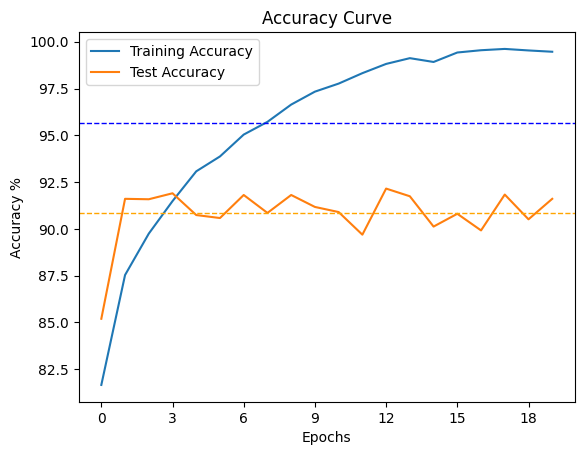

In [219]:
plt.figure()
plt.plot([acc * 100 for acc in history.history['accuracy']], label='Training Accuracy')
plt.plot([val_acc * 100 for val_acc in history.history['val_accuracy']], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.title('Accuracy Curve')
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

mean_accuracy = np.mean(history.history['accuracy'])
mean_val_accuracy = np.mean(history.history['val_accuracy'])
plt.axhline(mean_accuracy * 100, color='blue', linestyle='--', linewidth=1, label=f'Mean Training Accuracy ({mean_accuracy*100:.2f}%)')
plt.axhline(mean_val_accuracy * 100, color='orange', linestyle='--', linewidth=1, label=f'Mean Validation Accuracy ({mean_val_accuracy*100:.2f}%)')

plt.show()

In [220]:
 # Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > DUB_share).astype(int)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [221]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3258  127]
 [ 236  762]]


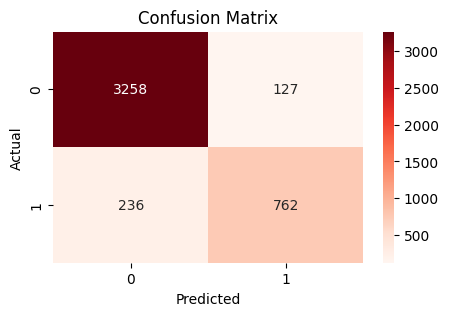

In [222]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [223]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


Accuracy: 91.72%
Precision: 85.71%
Recall: 76.35%
F1 Score: 80.76%


AUC Score: 96.17%


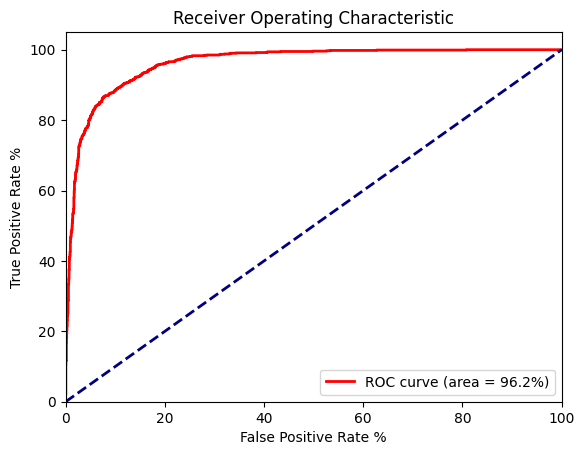

In [224]:
# AUC Score and Curve
auc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f'AUC Score: {auc_score:.2%}')
#
plt.figure()
plt.plot(fpr*100, tpr*100, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.1%})')
plt.plot([0, 100], [0, 100], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 100])
plt.ylim([0.0, 105])
plt.xlabel('False Positive Rate %')
plt.ylabel('True Positive Rate %')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [226]:
'''
  Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 18, 42, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 21, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 19, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─
'''

'\nLayer (type)                    ┃ Output Shape           ┃       Param # ┃\n┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩\n│ conv2d (Conv2D)                 │ (None, 18, 42, 32)     │           896 │\n├─────────────────────────────────┼────────────────────────┼───────────────┤\n│ max_pooling2d (MaxPooling2D)    │ (None, 9, 21, 32)      │             0 │\n├─────────────────────────────────┼────────────────────────┼───────────────┤\n│ conv2d_1 (Conv2D)               │ (None, 7, 19, 64)      │        18,496 │\n├─────────────────────────────────┼────────────────────────┼───────────────┤\n│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 9, 64)       │             0 │\n├─────────────────────────────────┼────────────────────────┼───────────────┤\n│ conv2d_2 (Conv2D)               │ (None, 1, 7, 128)      │        73,856 │\n├─────────────────────────────────┼────────────────────────┼───────────────┤\n│ flatten (Flatten)               │ (None, 896)            │   